# Ensemble Learning

## Agenda

- Introduction to Ensemble Learning
  - Goals
  - Importance
  - Weak and Strong Learners in Ensemble Learning
- Categories in Ensemble Learning
  - Sequential Ensembling Technique
  - Parallel Ensembling Techniques
- Simple Ensembling Techniques
  - Voting
    - Hard Voting
    - Soft Voting
- Advanced Techniques
  - Bagging(BootStrap Aggregating)
    - Bagging Technique
    - Advantages
    - Disadvantages
    - Out-of-Bag Concept
  - Boosting
    - Boosting Techniques
    - Advantages
    - Disadvantages
  - Stacking
    - Advantages and Disadvantages

### Introduction to Ensemble Learning

Ensemble Learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental Principle of ensemble learning is combining te predictions from multiple individual models to produce more accurate  and robust prediction than any single model.

#### Goals
- Enhance predictive accuracy by combining multiple models
- Improve model robustness and generalization performance.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png)

### Importance
- Improves prediction Accuracy
- Enhance model resilience
- Mitigates biases and error present in individual models
- captures wide range of perspectives 

### Weak and Strong Learners in Ensemble Learning
- A **Weak Learner** or **Base Learner** is a learning algorithm capable of producing classifiers with the probability of error strictly less than that random guessing
- A **Strong Learner**  is able to yield classifiers with arbitarily small error probability. It performs much better than random guessing

An Ensemble (or Committee) of classifiers is a classifier build on some combination of weak learners. Through ensemble we try these classifiers to perform better than a single strong learner

## Categories in Ensemble Learning
Ensemble Learning can broadly classified into 2 categories
- Sequential Ensemble Technique
- Parallel Ensemble Technique

### Sequential Ensemble Technique

These techniques trains models sequentially, with each model trying to correct predecessor's error. This techniques focus upon improving the overall performance of the ensemble by iteratively refining predictions. it uses weak learner as base models. An Example of this approach is Boosting.
#### Steps
- **Base Model Selection** : Choose the initial Model
- **Sequential Training**
- **Error Correction**
- **Prediction Refinement**
- **Combining the Predictions**
- **Evaluation**

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png)

if all base models are of the same type, it is considered to be a homogeneous ensemble. if they are different, it is considered heterogeneous

**The Sequential Enseble technique is employed when dealing with**
- Complex Relation between features and target
- Diverse data types, including numerical, categorical etc data
- Imbalanced Datatsets
- Incremental upadtes are need to adapt models gradually to evolving data over time

### Parallel Ensemble Technique

The parallel ensemble techniques trains the models concurrently. They combine the preditions from multiple models to improve the final output. bagging and Random Forest are examples for parallel ensemble techniques. It employes strong learners as base estimators.

#### Steps
- **Data Partitioning** : Divide the dataset into subsets
- **Model Training**: Train models concurrently on subsets
- **Predictions**: models make independent predictions
- **Combining the Predictions**: aggregate preditions using techniques like voting(classification) or averaging(Regression)
- **Evaluation**: Assess the preformance


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png)

## Voting
Voting is one of the fundamental methods of ensemble learning. it involves aggregating the predictions from multiple models to arrive at a final prediction. Two common types of voting are
- Majority Voting / Hard Voting
- Weighted Voting / Soft Voting

### Majority Voting / Hard Voting
Majority Voting / Hard Voting is an ensemble learning classification technique. it involves multiple models, making predictions for each data point. Each model prediction is considered a **vote**. The final prediction is determined by majority voting among the models

#### Weighted Voting/Soft Voting
Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.

In [1]:
# Implement Hard Voting and Soft Voting on breast-cancer-wisconsin.data

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier

In [3]:
# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

col = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df =  pd.read_csv(url, header = None)
df.columns =  col
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
df.Class.value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [7]:
# Drop Sample code column, replace '?' in Bare Nuclei with 0 and convert to int64
# Replace class values to binary (2 for benign, 4 for malignant)
df = df.drop(columns = ['Sample code'])
df['Bare Nuclei'] =  df['Bare Nuclei'].replace('?', 0).astype('int64')
df['Class'] = df['Class'].replace({2:0, 4:1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [12]:
df.Class.value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [13]:
# Extract Feature and Target, do Train test split

X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  25)

In [14]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,4.423971,3.116279,3.211091,2.772809,3.207513,3.423971,3.441860,2.822898,1.533095
std,2.850680,3.041953,2.966084,2.834802,2.196416,3.614616,2.399171,3.011765,1.640186
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,3.500000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: ylabel='Density'>

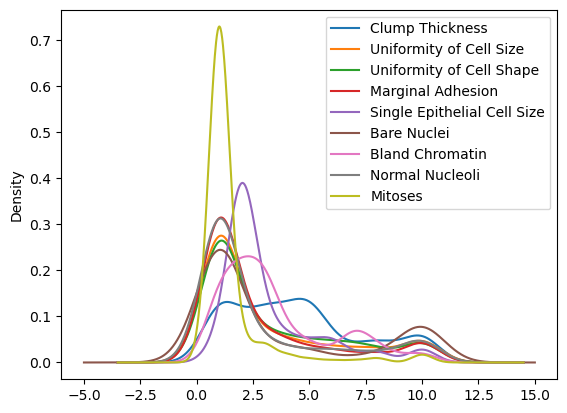

In [15]:
X_train.plot.kde()

In [16]:
scaler =  MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [17]:
# Initialize the list of base models

estimators = [
    ('logistic', LogisticRegression()),
    ('dtc', DecisionTreeClassifier()),
    ('svc', SVC(probability = True))
]

In [18]:
# Create Voting Classifier ensemble with estimators(HARD VOTING)

ensemble =  VotingClassifier(estimators, voting = 'hard')

# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Train an evaluate model using Cross Validation

results = cross_val_score(ensemble, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Hardvoting Ensemble {results.mean():.4f}')

ensemble.fit(X_train_scaled, y_train)

y_test_pred = ensemble.predict(X_test_scaled)

print(f'Test Accuracy  - Hardvoting Ensemble {accuracy_score(y_test, y_test_pred):.4f}')

Mean Cross Validation Accuracy - Hardvoting Ensemble 0.9589
Test Accuracy  - Hardvoting Ensemble 0.9571


Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.90      0.98      0.94        46

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



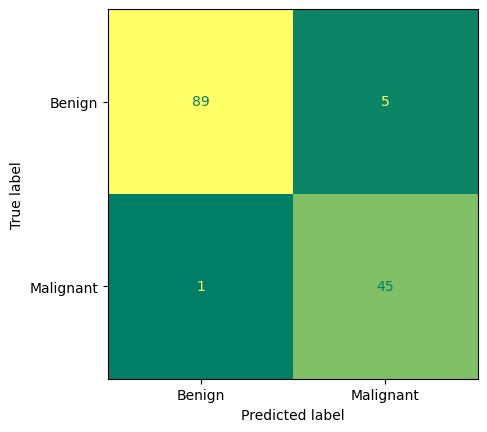

In [19]:
print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

Mean Cross Validation Accuracy - Softvoting Ensemble 0.9589
Test Accuracy  - Softvoting Ensemble 0.9429
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.88      0.96      0.92        46

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.94      0.94       140



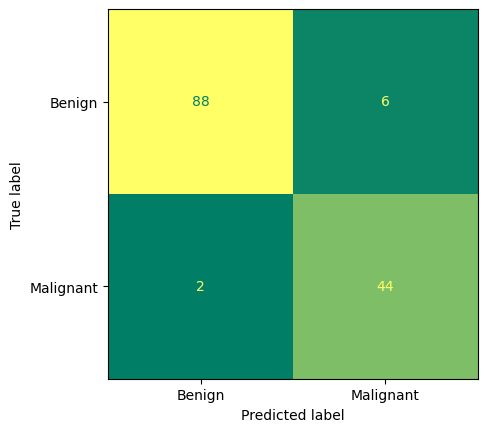

In [20]:
# Create Voting Classifier ensemble with estimators(Soft VOTING)

ensemble =  VotingClassifier(estimators, voting = 'soft')

# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Train an evaluate model using Cross Validation

results = cross_val_score(ensemble, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Softvoting Ensemble {results.mean():.4f}')

ensemble.fit(X_train_scaled, y_train)

y_test_pred = ensemble.predict(X_test_scaled)

print(f'Test Accuracy  - Softvoting Ensemble {accuracy_score(y_test, y_test_pred):.4f}')


print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

## Advanced Techniques
These techniques use complex methods to merge the predictions from individual models.

## Bagging


Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.__Note:__ Random Forest is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png)

In [21]:
# Implementation

from sklearn.ensemble import BaggingClassifier

In [22]:
# load the data

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df =  pd.read_csv(url, names = names)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Extract Feature and Target, do Train test split

X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  25)

In [24]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [25]:
scaler =  MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [26]:
# Set up Kfold 
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

In [27]:
cart =  DecisionTreeClassifier()
num_trees = 100

In [28]:
bagging_model =  BaggingClassifier(estimator = cart, n_estimators = num_trees, random_state = 25, oob_score = True)

Mean Cross Validation Accuracy - Bagging Classifier 0.7525
Test Accuracy  -Bagging Classifier 0.8052
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



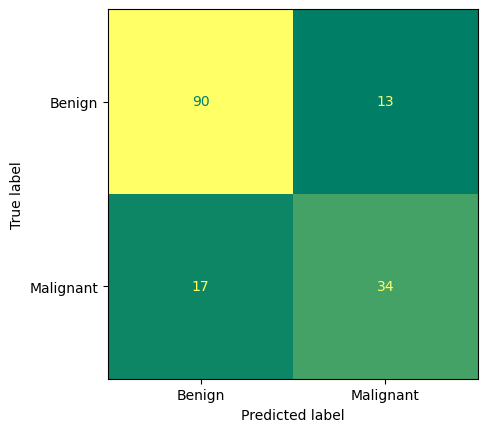

In [29]:
# Train an evaluate model using Cross Validation

results = cross_val_score(bagging_model, X_train_scaled, y_train, cv = kf, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy - Bagging Classifier {results.mean():.4f}')

bagging_model.fit(X_train_scaled, y_train)

y_test_pred = bagging_model.predict(X_test_scaled)

print(f'Test Accuracy  -Bagging Classifier {accuracy_score(y_test, y_test_pred):.4f}')


print(f'Classification Report \n {classification_report(y_test, y_test_pred)}')
cm =  confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap =  'summer')
plt.show()

## Advantages of Bagging
- It reduces the risk of overfitting by training on different subsets of the data
- it also improves models accuracy and stability
- it works well with complex models that tend to overfit
## Disadvantages
- It increases computationalcomplexity because it requires training multiple models.

## Out-of-Bag Concept (OOB)

In Bagging, Out of Bag (OOB) refers to instances not included in the bootstrap samples for training a specific base model. Since the process trains each model on a random subset of original data, it naturally leaves out some instances. Theses OOB instances serve as built in validation set for model, allowing for an asssesment of the models performance on unseen data.
we can compute the oob error, which offers efficient way to evaluate models generalization capbilities. This method eliminates the need for validation data or cross validation procedures.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Out_Of_Bag_Concept.png)

In [31]:
## Perform cross-validation and compute oob error

oob_error =  1- bagging_model.oob_score_
print(f'Error on Out of Bag Samples {oob_error:.4f}')

Error on Out of Bag Samples 0.2427


# Boosting

Boosting is a sequential Ensembling Technique where each model corrects the predecessors  mistakes. The main idea is to train the models sequentially, each trying to corrent the errors of the previous model. The Final prediction is a weighted sum of all the models predcitions. Popular Boosting algorithms are AdaBoost, Gradient Boosting Machine(GBM) and XGBoost


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Boosting.png)

There are various meta algorithms in boosting that differentiate how the base models are aggregated, such as
- AdaBoost
- GradientBoost
- XGBoost
- CatBoost

## AdaBoost Algorithm

AdaBoost, an abbreviation for adaptive boosting, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases.
**The AdaBoost algorithm follows these steps:**

1. Initially, the algorithm assigns equal weights to all observations in the dataset.2. A model is constructed using a subset of the data.3. Predictions are made on the entire dataset using this model.4. The algorithm computes errors by comparing these predictions to the actual values.5. In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.6. Weights are determined based on error values, where higher errors result in heavier observation weights.7. This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.

In [ ]:
# Implementation of Adaboost Classifier

In [33]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

col = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df =  pd.read_csv(url, header = None)
df.columns =  col
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
# Drop Sample code column, replace '?' in Bare Nuclei with 0 and convert to int64
# Replace class values to binary (2 for benign, 4 for malignant)
df = df.drop(columns = ['Sample code'])
df['Bare Nuclei'] =  df['Bare Nuclei'].replace('?', 0).astype('int64')
df['Class'] = df['Class'].replace({2:0, 4:1})

In [36]:
# Extract Feature and Target, do Train test split

X =  df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  25)

AdaBoost Mean Cross Validation Accuracy 0.9517
AdaBoost Train Accuracy 0.9732
AdaBoost Test Accuracy 0.9571
Classification Report - Adaboost
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.92      0.96      0.94        46

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



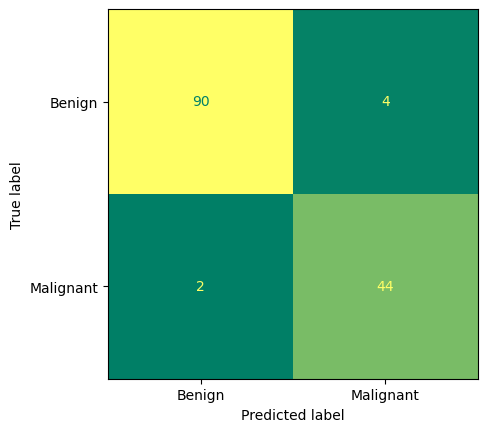

In [41]:
# Define KFold
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Create Pipeline for Adaboost
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler()),
    ('classifier', AdaBoostClassifier(n_estimators =70, random_state = 25, algorithm='SAMME'))
])

# Evaluate the pipeline using cross validation
adaboost_results =  cross_val_score(adaboost_pipeline, X_train, y_train, cv = kf)
print(f'AdaBoost Mean Cross Validation Accuracy {adaboost_results.mean():.4f}')

# Fit adaboost pipeline on training set and evaluate for test set
adaboost_pipeline.fit(X_train,y_train)
y_pred =  adaboost_pipeline.predict(X_test)
y_pred_train = adaboost_pipeline.predict(X_train)
test_acc =  accuracy_score(y_test, y_pred)
train_acc =  accuracy_score(y_train, y_pred_train)

print(f'AdaBoost Train Accuracy {train_acc:.4f}')
print(f'AdaBoost Test Accuracy {test_acc:.4f}')

# print classification report and Confusion Matrix

print('Classification Report - Adaboost')
print(classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
cm_display =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap = 'summer')
plt.show()


Random Forest Mean Cross Validation Accuracy 0.9660
Random Forest Train Accuracy 1.0000
Random Forest Test Accuracy 0.9571
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        94
           1       0.88      1.00      0.94        46

    accuracy                           0.96       140
   macro avg       0.94      0.97      0.95       140
weighted avg       0.96      0.96      0.96       140



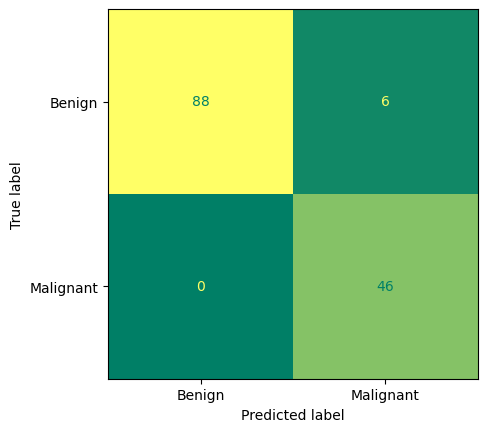

In [43]:
## Apply RandomForestClassifier on same set

# Define KFold
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Create Pipeline for RF
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators =70, random_state = 25))
])

# Evaluate the pipeline using cross validation
rf_results =  cross_val_score(rf_pipeline, X_train, y_train, cv = kf)
print(f'Random Forest Mean Cross Validation Accuracy {rf_results.mean():.4f}')

# Fit rf pipeline on training set and evaluate for test set
rf_pipeline.fit(X_train,y_train)
y_pred =  rf_pipeline.predict(X_test)
y_pred_train = rf_pipeline.predict(X_train)
test_acc =  accuracy_score(y_test, y_pred)
train_acc =  accuracy_score(y_train, y_pred_train)

print(f'Random Forest Train Accuracy {train_acc:.4f}')
print(f'Random Forest Test Accuracy {test_acc:.4f}')

# print classification report and Confusion Matrix

print('Classification Report - Random Forest')
print(classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
cm_display =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap = 'summer')
plt.show()


# Gradient Boosting Machine
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models**Gradient Boosting involves three main components:*** Loss Function: The choice of loss function depends on the type of problem being solved (e.g., regression, classification). The goal is to find a model that minimizes the loss function.
* Weak Learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.* Additive Model: Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble so far.

## XGBoost
XGBoost, or eXtreme Gradient Boosting, stands out as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification, regression, and ranking. This advanced algorithm builds upon the principles of gradient boosting and is celebrated for its exceptional accuracy and scalability in handling complex predictive modeling challenges. **XGBoost offers many essential features that make it ideal for classification tasks. Some of the reasons include:*** High performance: As mentioned above, XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.* Regularization methods: L1 (Lasso) and L2 (Ridge) regularisation terms are included in XGBoost to avoid overfitting and increase generalization.* Handle missing data: Moreover, XGBoost can handle missing data automatically, minimizing the need for preprocessing and imputation.


##  CatBoostCatboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features.

In [45]:
#!pip install xgboost
#!pip install catboost

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Gradient Boosting Mean Cross Validation Accuracy 0.9678
Gradient Boosting Train Accuracy 1.0000
Gradient Boosting Test Accuracy 0.9571
Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.90      0.98      0.94        46

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



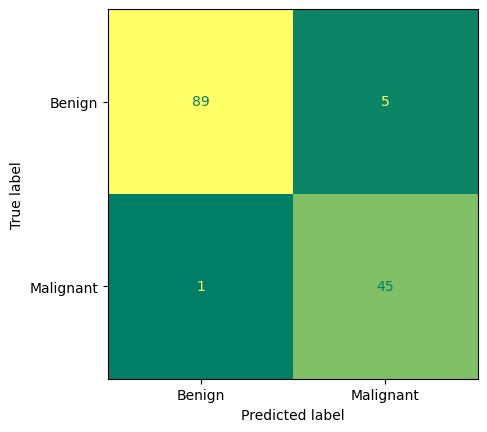

In [47]:
# Implement Gradient Boosting Machine

# Define KFold
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Create Pipeline for GBM
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler()),
    ('classifier', GradientBoostingClassifier())
])

# Evaluate the pipeline using cross validation
gb_results =  cross_val_score(gb_pipeline, X_train, y_train, cv = kf)
print(f'Gradient Boosting Mean Cross Validation Accuracy {gb_results.mean():.4f}')

# Fit Gradient Boosting pipeline on training set and evaluate for test set
gb_pipeline.fit(X_train,y_train)
y_pred =  gb_pipeline.predict(X_test)
y_pred_train = gb_pipeline.predict(X_train)
test_acc =  accuracy_score(y_test, y_pred)
train_acc =  accuracy_score(y_train, y_pred_train)

print(f'Gradient Boosting Train Accuracy {train_acc:.4f}')
print(f'Gradient Boosting Test Accuracy {test_acc:.4f}')

# print classification report and Confusion Matrix

print('Classification Report - Gradient Boosting')
print(classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
cm_display =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap = 'summer')
plt.show()


XGboost Mean Cross Validation Accuracy 0.9607
XGboost Train Accuracy 1.0000
XGboost Test Accuracy 0.9500
Classification Report - XGboost
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        94
           1       0.90      0.96      0.93        46

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



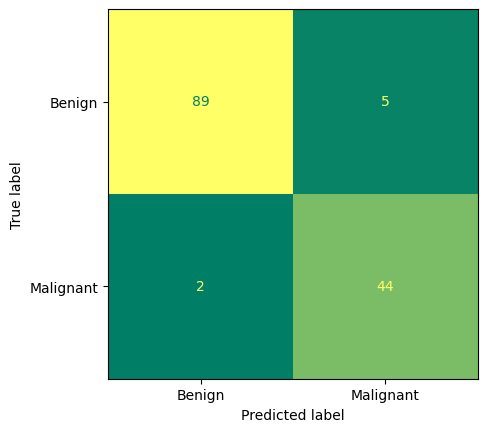

In [50]:
# Implement XGboost

# Define KFold
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Create Pipeline for Adaboost
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier())
])

# Evaluate the pipeline using cross validation
xgb_results =  cross_val_score(xgb_pipeline, X_train, y_train, cv = kf)
print(f'XGboost Mean Cross Validation Accuracy {xgb_results.mean():.4f}')

# Fit XGboost pipeline on training set and evaluate for test set
xgb_pipeline.fit(X_train,y_train)
y_pred =  xgb_pipeline.predict(X_test)
y_pred_train = xgb_pipeline.predict(X_train)
test_acc =  accuracy_score(y_test, y_pred)
train_acc =  accuracy_score(y_train, y_pred_train)

print(f'XGboost Train Accuracy {train_acc:.4f}')
print(f'XGboost Test Accuracy {test_acc:.4f}')

# print classification report and Confusion Matrix

print('Classification Report - XGboost')
print(classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
cm_display =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap = 'summer')
plt.show()


CatBoost Mean Cross Validation Accuracy 0.9714
CatBoost Train Accuracy 1.0000
CatBoost Test Accuracy 0.9643
Classification Report - CatBoost
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.92      0.98      0.95        46

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



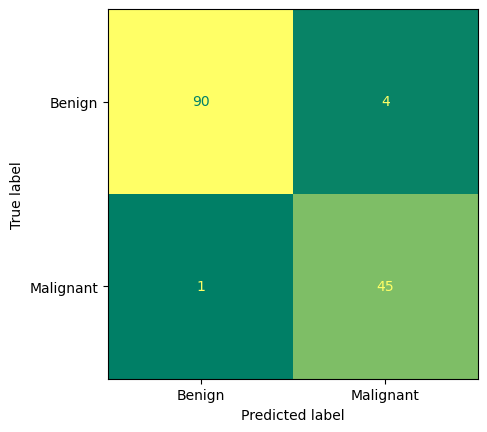

In [51]:
# implement CatBoost

# Define KFold
kf =  KFold(n_splits = 10, shuffle = True, random_state = 25)

# Create Pipeline for Adaboost
cb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler()),
    ('classifier', CatBoostClassifier(verbose = 0))
])

# Evaluate the pipeline using cross validation
cb_results =  cross_val_score(cb_pipeline, X_train, y_train, cv = kf)
print(f'CatBoost Mean Cross Validation Accuracy {cb_results.mean():.4f}')

# Fit CatBoost pipeline on training set and evaluate for test set
cb_pipeline.fit(X_train,y_train)
y_pred =  cb_pipeline.predict(X_test)
y_pred_train = cb_pipeline.predict(X_train)
test_acc =  accuracy_score(y_test, y_pred)
train_acc =  accuracy_score(y_train, y_pred_train)

print(f'CatBoost Train Accuracy {train_acc:.4f}')
print(f'CatBoost Test Accuracy {test_acc:.4f}')

# print classification report and Confusion Matrix

print('Classification Report - CatBoost')
print(classification_report(y_test, y_pred))

cm =  confusion_matrix(y_test, y_pred)
cm_display =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False, cmap = 'summer')
plt.show()


# Stacking

Stacking combines multiple classification or regression models via a meta model which could be a meta-classifier or a meta-regressor. After training the base models on the complete dataset, the meta-model trains on the base models' outputs as features, to give final prediction.This technique leverages the strengths of each base model and can achieve higher accuracy.* In stacking, as opposed to bagging, a variety of models (not solely decision trees) are employed, all of which are trained on the same full dataset rather than on subsets.* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

- Stacking aims to leverage the advantages of different base models by inputting their predictions into a meta-model.
The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.
* Level-0 Models (**Base Models**): These models are trained on the full training dataset, and their individual predictions are aggregated.
* Level-1 Model (**Meta-Model**): This model is designed to optimally combine the predictions of multiple base models to generate the final prediction.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/image7.png)

In [52]:
# in order to implement stacking we need a library called vecstack

!pip install vecstack

In [55]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from vecstack import stacking


In [56]:
# Read the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

df =  pd.read_csv(url, names = names, header = None)
df.head()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
# Seperate Features and Target
X =  df.drop(columns = ['Class'])
y =  df['Class']

In [58]:
y.value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [59]:
# Label Encoding Target for xgboost

le = LabelEncoder()
y = le.fit_transform(y)

In [61]:
pd.Series(y).value_counts()

1    71
0    59
2    48
Name: count, dtype: int64

In [62]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =25)

In [65]:
# Define Base Models
models = [
    KNeighborsClassifier(n_neighbors =5),
    RandomForestClassifier(random_state = 25),
    XGBClassifier()    
]

# define Meta Model
meta_model = LogisticRegression()

__S Train__ refers to a subset of the original training data used for training base models in a stacking ensemble.

__S Test__ is another subset used to generate base model predictions, serving as input for the meta-model. It is crucial for generating predictions from these base models, which then act as new features for the meta-model.
This two-step approach allows the ensemble to capture and leverage the unique strengths of each base model, thus improving overall predictive performance.

In [68]:
# Perform Stacking
S_train, S_test =  stacking(models, X_train, y_train, X_test, regression = False, 
                           metric = accuracy_score, n_folds = 5, stratified = True, 
                           shuffle = True, random_state = 25, verbose =2)

# Train the meta Model

meta_model.fit(S_train, y_train)

# make predictions with meta model
y_pred_test = meta_model.predict(S_test)

acc =  accuracy_score(y_test,y_pred_test)
train_acc =  accuracy_score(y_train,meta_model.predict(S_train))
print(f'Accuracy of Stacking Ensemble with Log. Reg. as meta model Train Data: {train_acc:.4f}')
print(f'Accuracy of Stacking Ensemble with Log. Reg. as meta model Test Data: {acc:.4f}')

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.68965517]
    fold  1:  [0.75862069]
    fold  2:  [0.57142857]
    fold  3:  [0.67857143]
    fold  4:  [0.64285714]
    ----
    MEAN:     [0.66822660] + [0.06123848]
    FULL:     [0.66901408]

model  1:     [RandomForestClassifier]
    fold  0:  [0.96551724]
    fold  1:  [1.00000000]
    fold  2:  [1.00000000]
    fold  3:  [0.96428571]
    fold  4:  [0.96428571]
    ----
    MEAN:     [0.97881773] + [0.01730109]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]
    fold  0:  [0.96551724]
    fold  1:  [0.96551724]
    fold  2:  [0.96428571]
    fold  3:  [0.92857143]
    fold  4:  [0.92857143]
    ----
    MEAN:     [0.95049261] + [0.01790422]
    FULL:     [0.95070423]

Accuracy of Stacking Ensemble with Log. Reg. as meta model Train Data: 0.9577
Accuracy of Stacking Ensemble with Log. Reg. a